### Avocado Project

#### Problem Statement:

#### Avocado is a fruit consumed by people heavily in the United States. 

#### Content:
    
**The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.** 

**Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.**



This problem can be seen in two angles. 

1. To find the region of the avacadoes considering this as a classification problem.
2. To find the average price of avacadoes considering this as a regression problem.

In [1]:
#Loading the dataset
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('avocado.csv')
data.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [2]:
data.shape

(18249, 14)

We have 18249 rows and 14 columns in the dataset. The first column is just the index number for each data which is just for identification purpose. So we have 14 columns including the index column. We can drop the first column as it doesn't impact the target variable. 

In [3]:
data.drop('Unnamed: 0',axis = 1, inplace = True)

In [4]:
data.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

We have integer type data in column 'Year'. Then we have object type data in columns ['Data','type','region']. Rest of the columns are having float type of data.

In [5]:
data.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

### Features in Dataset(Independent Variable)

1. Date - The date of the observation
2. Total Volume - Total number of avocados sold

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

3. 4046 - Total number of avocados with PLU 4046 sold
4. 4225 - Total number of avocados with PLU 4225 sold
5. 4770 - Total number of avocados with PLU 4770 sold
6. Total Bags - Avocados sold in total bags

7. Small Bags - Avocadoes sold in small bags
8. Large Bags - Avocados sold in large bags
9. XLarge Bags - Avocados sold in extra large bags.
10. type - type - conventional or organic
11. year - the year

### Target in Dataset(Dependent Variable)

#### Classification Approach

If we consider the problem as a classification problem, we can consider the column 'region' as the target column.

Region - the city or region of the observation.

#### Regression Approach

If we consider the problem as a regression problem, we can consider the column 'AveragePrice' as the target column.

AveragePrice - the average price of a single avocado

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


We have integer, float and object type data in the dataset. There are 18249 non null values in each variables.

### Exploring the categorical data in Dataset

#### Converting the string to date in column 'Date'

The column 'Date' is showing as object type. So we can convert the string data to date.

In [7]:
data['Date'] = pd.to_datetime(data['Date'])

#### Column - 'type'

In [8]:
data['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

We have data for both conventional and organic type of avocados in the dataset.

#### Column - 'region'

In [9]:
data['region'].value_counts()

Northeast              338
Houston                338
California             338
Louisville             338
Southeast              338
LosAngeles             338
Boston                 338
Pittsburgh             338
MiamiFtLauderdale      338
Nashville              338
Columbus               338
Syracuse               338
West                   338
Detroit                338
Portland               338
LasVegas               338
Orlando                338
Indianapolis           338
CincinnatiDayton       338
Chicago                338
Tampa                  338
Denver                 338
Roanoke                338
Midsouth               338
RichmondNorfolk        338
PhoenixTucson          338
RaleighGreensboro      338
Seattle                338
StLouis                338
Charlotte              338
Spokane                338
GreatLakes             338
DallasFtWorth          338
TotalUS                338
Philadelphia           338
Albany                 338
NewYork                338
B

### Checking for missing values

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


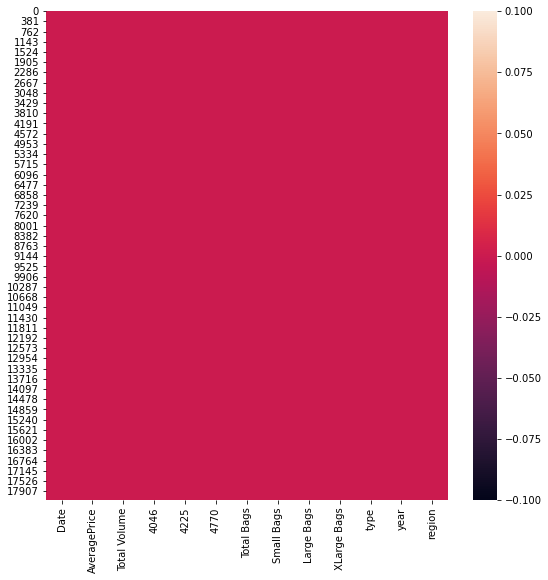

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[9,9])
sns.heatmap(data.isnull())
print(data.isnull().sum())

We are not having any missing data in the dataset.

### Data Visualization

#### Univariate Analysis

Since most of the columns are having float type data, we can use histogram plot to plot the continuous type data to identify frequency of data over specified range.

In [11]:
import matplotlib.ticker as tick
#User defined function to plot the columns in histogram plot.
import numpy as np

def histogramplot(col):
    plt.figure(figsize=[4,4])
    sns.histplot(x =col,data = data,bins =6,kde=True)
    np.set_printoptions(suppress = True)
    print(np.histogram(data[col],bins=6))
    ax = plt.gca()
    ax.ticklabel_format(style='plain')
    plt.xticks(rotation = 90)

(array([1548, 7636, 6521, 2117,  365,   62], dtype=int64), array([0.44      , 0.90833333, 1.37666667, 1.845     , 2.31333333,
       2.78166667, 3.25      ]))


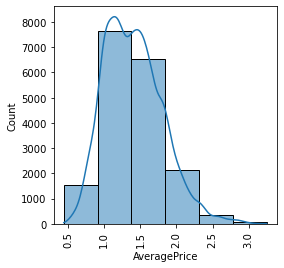

In [12]:
histogramplot('AveragePrice')

The data is having almost a normal distribution of data. Most of the data is plotted between the ragne 0.90 to 1.85. 

(array([18076,     4,    58,   100,     8,     3], dtype=int64), array([      84.56, 10417678.22, 20835271.88, 31252865.54, 41670459.2 ,
       52088052.86, 62505646.52]))


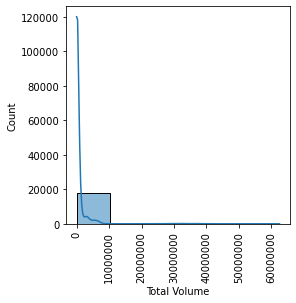

In [13]:
histogramplot('Total Volume')

The data is showing a skewness towards the left side. Almost all data is distributed between the range 80 to 104.17 lakh.

(array([18050,    33,    63,    90,    11,     2], dtype=int64), array([       0.   ,  3790602.695,  7581205.39 , 11371808.085,
       15162410.78 , 18953013.475, 22743616.17 ]))


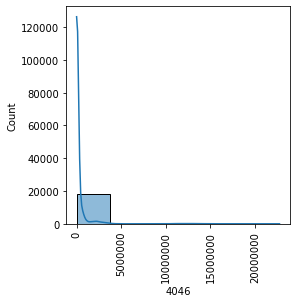

In [14]:
histogramplot('4046')

The data is showing a skewness towards the left side. Almost all data is distributed between the range 00 to 37.9 lakh.

(array([18050,    30,    45,    96,    23,     5], dtype=int64), array([       0.        ,  3411762.10166667,  6823524.20333333,
       10235286.305     , 13647048.40666667, 17058810.50833333,
       20470572.61      ]))


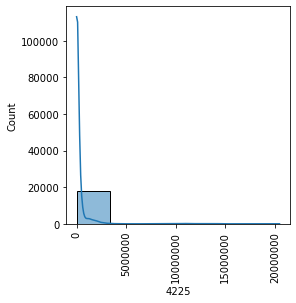

In [15]:
histogramplot('4225')

The data is showing a skewness towards the left side. Almost all data is distributed between the range 00 to 34.11 lakh.

(array([18050,   120,    46,    22,    10,     1], dtype=int64), array([      0.        ,  424406.51833333,  848813.03666667,
       1273219.555     , 1697626.07333333, 2122032.59166667,
       2546439.11      ]))


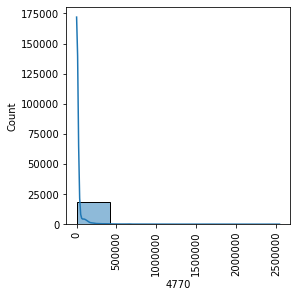

In [16]:
histogramplot('4770')

The data is showing a skewness towards the left side. Almost all data is distributed between the range 00 to 4.24 lakh.

(array([18066,    62,    38,    64,    16,     3], dtype=int64), array([       0.        ,  3228855.72833333,  6457711.45666667,
        9686567.185     , 12915422.91333333, 16144278.64166667,
       19373134.37      ]))


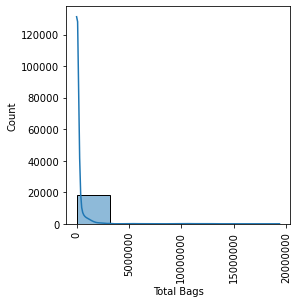

In [17]:
histogramplot('Total Bags')

The data is showing a skewness towards the left side. Almost all data is distributed between the range 00 to 32.29 lakh.

(array([18061,    48,    47,    59,    28,     6], dtype=int64), array([       0.        ,  2230764.46666667,  4461528.93333333,
        6692293.4       ,  8923057.86666667, 11153822.33333333,
       13384586.8       ]))


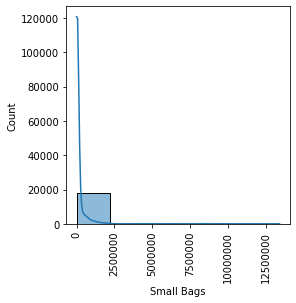

In [18]:
histogramplot('Small Bags')

The data is showing a skewness towards the left side. Almost all data is distributed between the range 00 to 22.31 lakh.

(array([18041,   110,    60,    32,     5,     1], dtype=int64), array([      0.        ,  953182.76833333, 1906365.53666667,
       2859548.305     , 3812731.07333333, 4765913.84166667,
       5719096.61      ]))


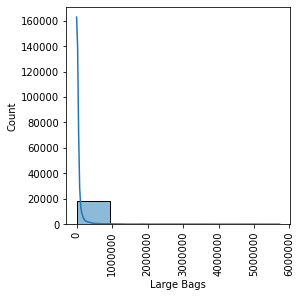

In [19]:
histogramplot('Large Bags')

The data is showing a skewness towards the left side. Almost all data is distributed between the range 00 to 9.53 lakh.

(array([18153,    51,    26,    13,     5,     1], dtype=int64), array([     0.        ,  91948.94166667, 183897.88333333, 275846.825     ,
       367795.76666667, 459744.70833333, 551693.65      ]))


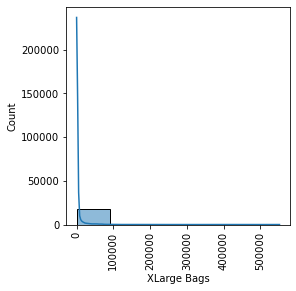

In [20]:
histogramplot('XLarge Bags')

The data is showing a skewness towards the left side. Almost all data is distributed between the range 00 to 91500.

We can categorize the data in column 'Date' as year and month to plot the data according to month and year. Since we already have a column 'Year', we can create the column 'Month' from the 'Date' Column.

In [21]:
data['Month'] = pd.DatetimeIndex(data['Date']).month

1     1944
3     1836
2     1728
5     1512
7     1512
10    1512
4     1404
8     1404
11    1404
12    1403
9     1296
6     1294
Name: Month, dtype: int64


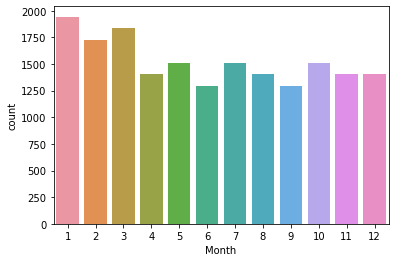

In [22]:
sns.countplot(data['Month'])
print(data['Month'].value_counts().sort_values(ascending = False))

Most of the data provided is from the month January. The least data for avocado sale is provided for the month June. But the distribution of data is almost similar for all months.

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


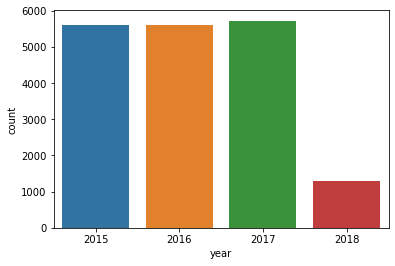

In [23]:
sns.countplot(data['year'])
print(data['year'].value_counts().sort_values(ascending = False))

The highest number of data is provided for the year 2017. The year for which least number of data provided is 2018. Except the year 2018, all the years are having a similar distribution of data.

conventional    9126
organic         9123
Name: type, dtype: int64


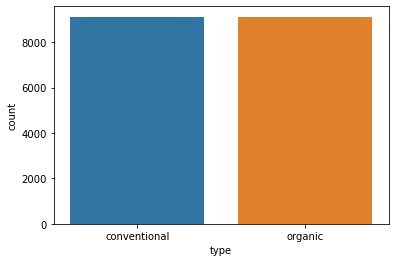

In [24]:
sns.countplot(data['type'])
print(data['type'].value_counts().sort_values(ascending = False))

We two category types of data in column 'type'. Data is having almost equal distribution for both the categories. 

#### Bivariate Analysis

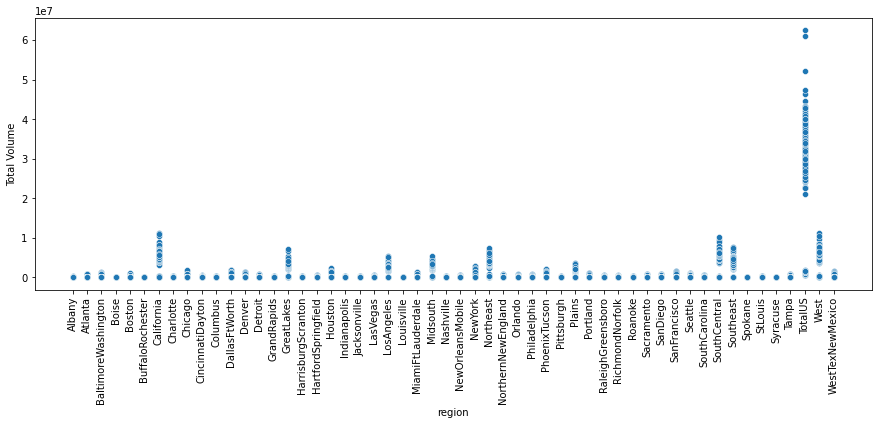

In [25]:
plt.figure(figsize = [15,5])
sns.scatterplot(data['region'],data['Total Volume'])
plt.xticks(rotation = 90)
plt.show()

From the above observations, the regions ['California','GreatLakes','LosAngeles','Midsouth','Northest','SouthCentral','Southeast','West'] are having high sales of avocados.

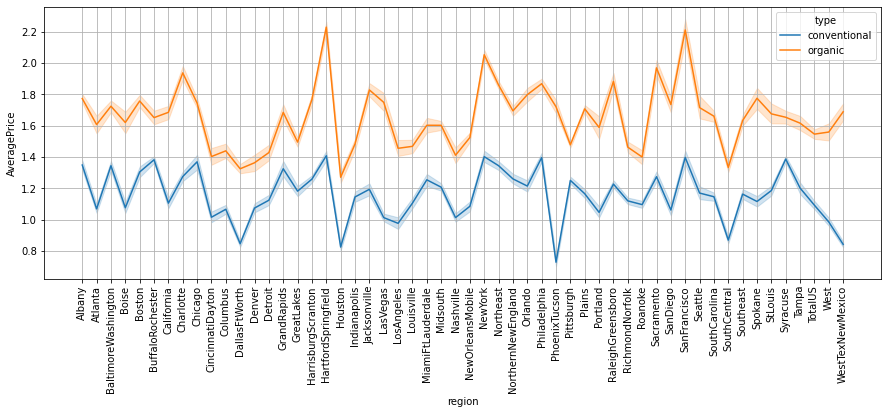

In [26]:
plt.figure(figsize = [15,5])
sns.lineplot(data['region'],data['AveragePrice'],hue='type',data = data)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

From the above observations, the region ['HartfordSpringfield','SanFrancisco'] are having higher price for the avacados per unit. While the region ['Houston','South Central'] are having the lowest average price for avacados per unit. Organic avocados are having higher average price than conventional ones. 

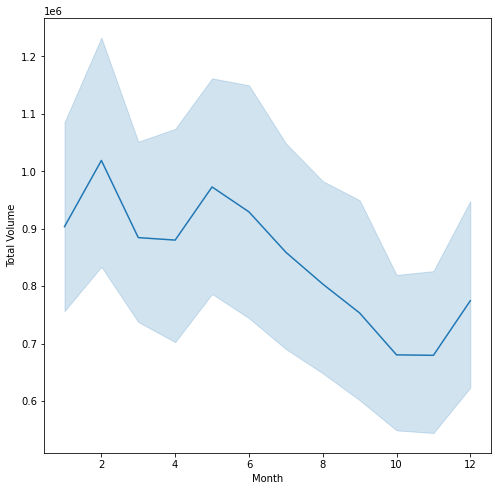

In [27]:
plt.figure(figsize = [8,8])
sns.lineplot('Month','Total Volume',data = data)
plt.show()

The sale volume is higher for the month Feburary than other months and it is lower for the month October and November.

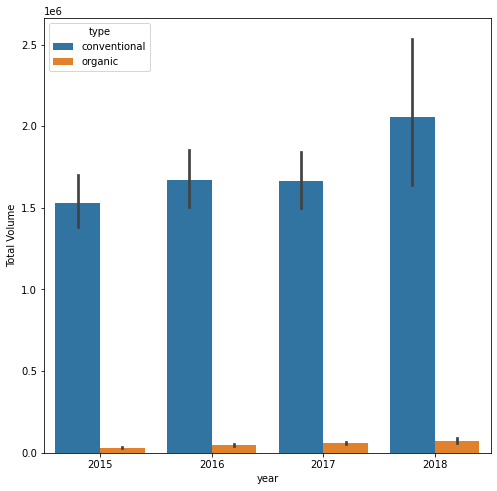

In [28]:
plt.figure(figsize = [8,8])
sns.barplot('year','Total Volume',hue='type',data = data)
plt.show()

The sale volume of avocados is increasing over years. That means the consumption of avacados in country is increasing as the time goes on.

### Encoding of categorical columns('type','region')

In [29]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
onc = OrdinalEncoder()
lnc = LabelEncoder()

In [30]:
data['type'] = onc.fit_transform(data['type'].values.reshape(-1,1))    #Ordinal encoding for normal categorical data
data['region'] = lnc.fit_transform(data['region'].values.reshape(-1,1))    #Label encoding for target or label.

In [31]:
data.sample(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
13427,2016-04-03,2.08,47308.85,5327.82,16420.01,2448.53,23112.49,21876.59,1235.90,0.00,1.0,2016,28,4
18044,2018-01-07,1.59,27296.20,3740.22,6593.66,0.00,16962.32,1579.33,15382.99,0.00,1.0,2018,36,1
16419,2017-04-30,2.38,4681.64,2188.24,289.11,0.00,2204.29,1853.34,350.95,0.00,1.0,2017,31,4
16140,2017-08-06,1.54,8077.28,71.27,2677.74,0.00,5328.27,2337.43,2990.84,0.00,1.0,2017,26,8
14278,2016-11-20,1.22,120110.49,31129.00,2922.52,0.00,86058.97,83113.68,2945.29,0.00,1.0,2016,45,11
13022,2016-01-17,1.80,2613.23,1828.50,113.83,10.90,660.00,660.00,0.00,0.00,1.0,2016,20,1
10103,2015-03-15,1.27,12371.76,9740.17,688.26,0.00,1943.33,1943.33,0.00,0.00,1.0,2015,18,3
13520,2016-06-19,1.42,10848.56,3.88,144.87,0.00,10699.81,10699.81,0.00,0.00,1.0,2016,30,6
2416,2015-07-12,1.17,2748745.96,1578243.11,467848.98,72897.71,629756.16,501415.01,127742.54,598.61,0.0,2015,46,7
17864,2018-01-07,1.73,10293.36,1701.33,2012.10,0.00,6579.93,6553.06,26.87,0.00,1.0,2018,21,1


In [32]:
data.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                   float64
year                     int64
region                   int32
Month                    int64
dtype: object

We have encoded the categorical columns.

### Statistical Summary

#### Describe of the data

In [33]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644,6.177215
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788,3.534130
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000,3.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000,6.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000,9.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000,12.000000


<AxesSubplot:>

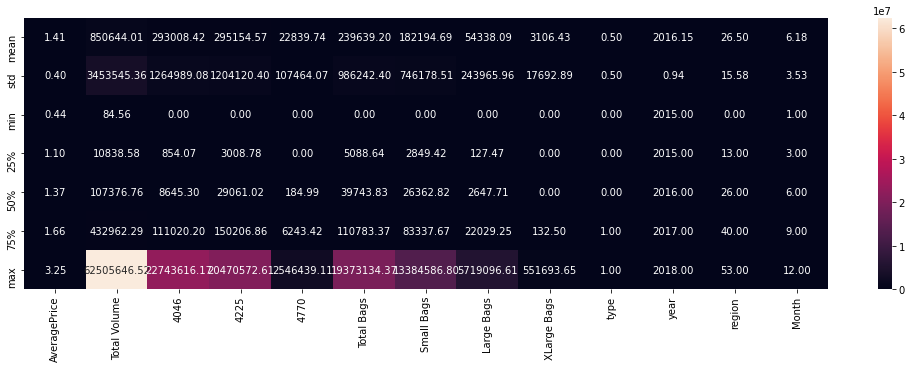

In [34]:
plt.figure(figsize = [18,5])
sns.heatmap(data.describe()[1:],annot = True, fmt = '0.2f')

1. The mean of the data is higher than the median for all the columns. That means, possible skewness is present in the data of these columns. 
2. The max value is having higher difference between the 75% for the columns ['AveragePrice','Total Volume','4026','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']. That means possible outliers are present in the data of these columns.

### Correlation

In [35]:
Correlation = data.corr()
Correlation

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716,0.162409
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176,-0.024689
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073,-0.025803
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726,-0.022108
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252,-0.033424
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256,-0.022724
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702,-0.023126
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768,-0.020187
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281,-0.012969
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280,-0.000085


<AxesSubplot:>

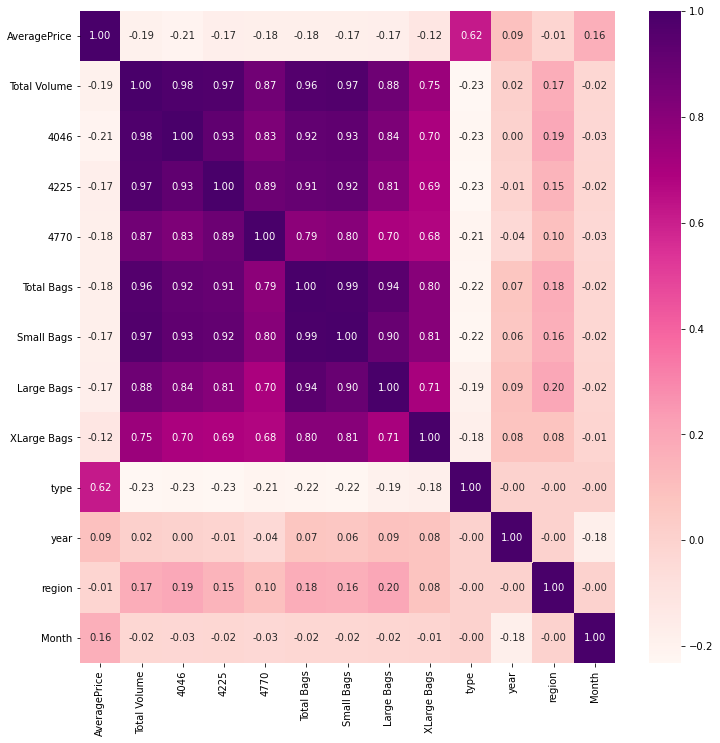

In [36]:
#Plotting the correlation of columns
plt.figure(figsize=[12,12])
sns.heatmap(Correlation,annot = True, fmt = '0.2f',cmap='RdPu')

### Correlation with Target Column

#### Considering 'region' as target column

Large Bags      0.198768
4046            0.192073
Total Bags      0.175256
Total Volume    0.174176
Small Bags      0.164702
4225            0.145726
4770            0.095252
XLarge Bags     0.082281
year           -0.000055
Month          -0.000144
type           -0.000280
AveragePrice   -0.011716
Name: region, dtype: float64


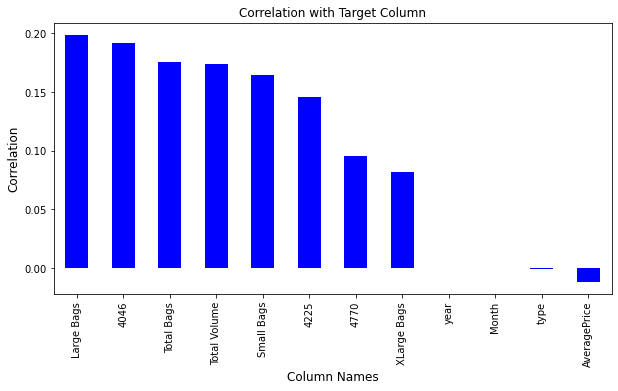

In [37]:
print(Correlation['region'].drop('region').sort_values(ascending = False))
plt.figure(figsize = [10,5])
Correlation['region'].sort_values(ascending= False).drop('region').plot(kind = 'bar', color ='b')
plt.xlabel('Column Names', fontsize = 12)
plt.ylabel('Correlation', fontsize = 12)
plt.title('Correlation with Target Column')
plt.show()

Observations:
    
1. Except the columns ['year','Month','type'] all other columns are having positive correlation with the column 'region'.
2. The column 'Large Bags' is having highest positive correlation with the column 'region'. The column 'AveragePrice' is having highest negative correlation with the column 'region'.
3. The column 'XLarge Bags' is having least positve correlation with the column 'region'. The column 'year' is having least negative correlation with the column 'region'.

#### Considering 'AveragePrice' as target column

type            0.615845
Month           0.162409
year            0.093197
region         -0.011716
XLarge Bags    -0.117592
4225           -0.172928
Large Bags     -0.172940
Small Bags     -0.174730
Total Bags     -0.177088
4770           -0.179446
Total Volume   -0.192752
4046           -0.208317
Name: AveragePrice, dtype: float64


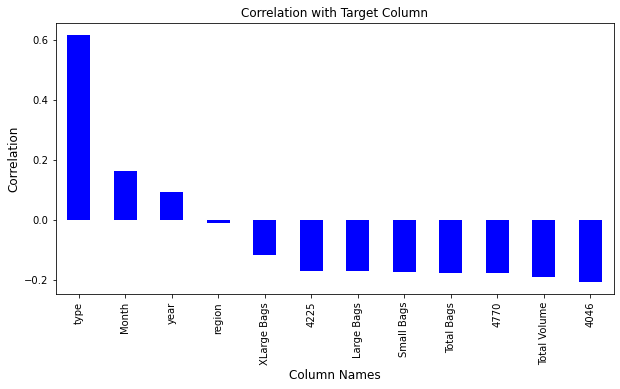

In [38]:
print(Correlation['AveragePrice'].drop('AveragePrice').sort_values(ascending = False))
plt.figure(figsize = [10,5])
Correlation['AveragePrice'].sort_values(ascending= False).drop('AveragePrice').plot(kind = 'bar', color ='b')
plt.xlabel('Column Names', fontsize = 12)
plt.ylabel('Correlation', fontsize = 12)
plt.title('Correlation with Target Column')
plt.show()

Observations:

1. Except the columns ['type','Month','year'] all the other columns are having negative correlation to the column 'AveragePrice'.
2. The column 'type' is having highest positive correlation with the column 'AveragePrice'. The column '4046' is having highest negative correlation with the column 'AveragePrice'.
3. The column 'year' is having least positve correlation with the column 'AveragePrice'. The column 'region' is having least negative correlation with the column 'AveragePrice'.

#### Since the column 'Date' is not providing any impact on the target variables. We can drop this column from the dataset.

In [39]:
data.drop('Date',axis = 1, inplace = True)

### Distribution of data in columns(Checking skewness of data)

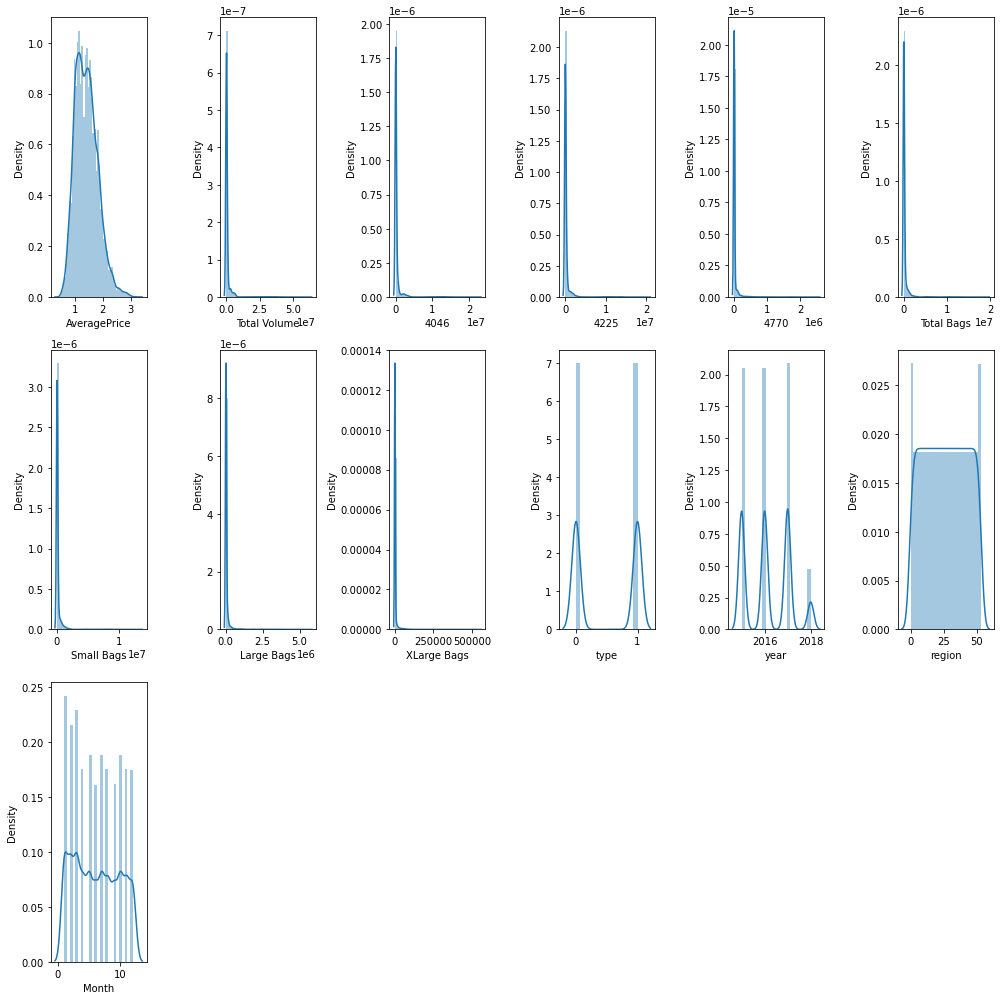

In [40]:
plt.figure(figsize = [14,14])
for i in range(0,len(data.columns.values)):
    plt.subplot(3,6,i+1)
    sns.distplot(data[data.columns.values[i]])
    plt.tight_layout()

The data is not normally distributed for all the columns. Skewness is present in all the columns.

### Skewness

In [41]:
Skewness = data.skew()
Skewness.sort_values(ascending = False)

XLarge Bags     13.139751
4770            10.159396
Large Bags       9.796455
Total Bags       9.756072
Small Bags       9.540660
Total Volume     9.007687
4225             8.942466
4046             8.648220
AveragePrice     0.580303
year             0.215339
Month            0.106617
type             0.000329
region           0.000030
dtype: float64

The column 'XLarge Bags' is having highest skewed data. The data in column 'region' is having least skewed data.

### Checking the presence of outliers

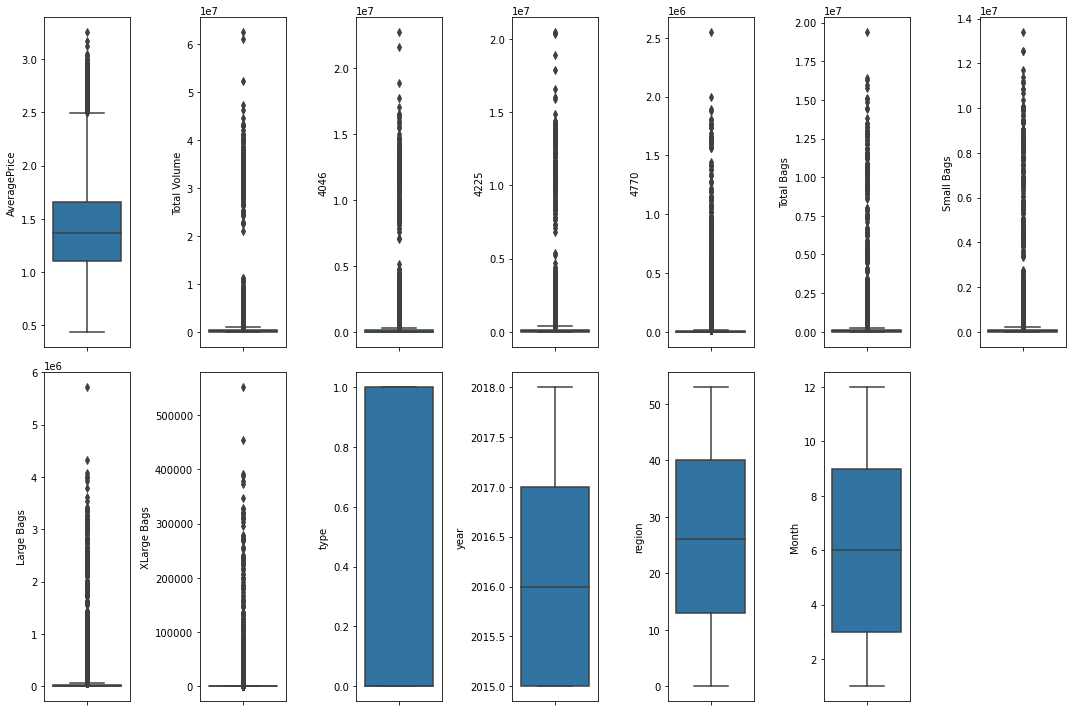

In [42]:
#Plotting the data of every columns with boxplot to check the outliers
plt.figure(figsize = [15,10])
for i in range(0,len(data.columns.values)):
    plt.subplot(2,7,i+1)
    sns.boxplot(y = data[data.columns.values[i]])
    plt.tight_layout()

From the above observations, extreme outliers are present in columns ['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']. There are no outliers present in column ['type','year','region','Month'].

### Data Cleaning

### Considering the column 'region' as Target variable and taking the classification approach to build the model

### Checking whether the data is balanced or not

0     338
27    338
39    338
8     338
24    338
40    338
9     338
25    338
41    338
10    338
26    338
42    338
11    338
43    338
16    338
12    338
28    338
44    338
13    338
29    338
45    338
14    338
30    338
46    338
15    338
31    338
23    338
7     338
38    338
22    338
32    338
48    338
1     338
17    338
33    338
49    338
2     338
18    338
34    338
50    338
3     338
19    338
35    338
51    338
4     338
20    338
36    338
52    338
5     338
21    338
37    338
6     338
47    338
53    335
Name: region, dtype: int64


<AxesSubplot:xlabel='region', ylabel='count'>

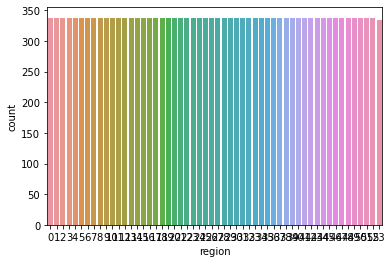

In [43]:
print(data['region'].value_counts())
sns.countplot(data['region'])

The data is distributed almost equally for all the categories. So it is almost balanced.

### Splitting the data before removing skewness

In [44]:
x = data.drop('region',axis = 1)
y = data['region']

In [45]:
print(x.shape)
print(y.shape)

(18249, 12)
(18249,)


In [46]:
#We can set the skewness standard limit as +/-0.8.
x.skew().sort_values(ascending=False)[np.abs(x.skew())>0.8]

XLarge Bags     13.139751
4770            10.159396
Large Bags       9.796455
Total Bags       9.756072
Small Bags       9.540660
Total Volume     9.007687
4225             8.942466
4046             8.648220
dtype: float64

Here the columns ['XLarge Bags','4770','Large Bags','Total Bags','Small Bags','Total Volume','4225','4046'] are having skewness which is above the standard limit. So lets remove the skewness of data of these columns.

In [47]:
from sklearn.preprocessing import power_transform
#user defined function for removing skewness for columns which are beyond standard range
def rskew(col):
    x[col]=power_transform((x[col].values.reshape(-1,1)))

In [48]:
rskew('XLarge Bags')
rskew('4770')
rskew('Large Bags')
rskew('Total Bags')
rskew('Small Bags')
rskew('Total Volume')
rskew('4225')
rskew('4046')

In [49]:
x.skew().sort_values(ascending = False)

XLarge Bags     0.793520
AveragePrice    0.580303
year            0.215339
Month           0.106617
4770            0.032184
Total Volume    0.011171
Small Bags      0.007058
type            0.000329
Total Bags     -0.001626
4225           -0.017740
4046           -0.022679
Large Bags     -0.073809
dtype: float64

We have removed the skewness of data which is above the standard limit.

### Removing the Outliers

In [50]:
from scipy.stats import zscore
df = x.copy()
df['region'] = y.copy()
z = np.abs(zscore(df))
z

array([[0.18868864, 0.08660524, 0.65861896, ..., 1.22128204, 1.64763162,
        1.7002522 ],
       [0.13901962, 0.15574567, 0.77686953, ..., 1.22128204, 1.64763162,
        1.7002522 ],
       [1.18206895, 0.17932662, 0.73194656, ..., 1.22128204, 1.64763162,
        1.7002522 ],
       ...,
       [1.15237477, 0.77150535, 0.61983119, ..., 1.97050371, 1.46495942,
        1.70081131],
       [1.30138182, 0.69807719, 0.55028196, ..., 1.97050371, 1.46495942,
        1.70081131],
       [0.53151208, 0.66380937, 0.36790819, ..., 1.97050371, 1.46495942,
        1.70081131]])

In [51]:
threshold = 3
df_new = df[(z<3).all(axis=1)]
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,region
0,1.33,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,0.0,2015,12,0
1,1.35,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,0.0,2015,12,0
2,0.93,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,0.0,2015,12,0
3,1.08,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,0.0,2015,12,0
4,1.28,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,0.0,2015,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1.0,2018,2,53
18245,1.71,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1.0,2018,1,53
18246,1.87,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1.0,2018,1,53
18247,1.93,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1.0,2018,1,53


In [52]:
df.shape

(18249, 13)

In [53]:
df_new.shape

(18025, 13)

In [54]:
data_loss = (df.shape[0]-df_new.shape[0])/df.shape[0]*100
data_loss

1.2274645186037592

We are losing only 1.23% of data after removing the outliers.

### Checking the Multicolinearity of variables in the dataframe

In [55]:
x = df_new.drop('region',axis = 1)
y = df_new['region']
c = x.columns
print(x.shape)
print(y.shape)

(18025, 12)
(18025,)


In [56]:
#Scaling the data using standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x,columns = c)
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,-0.172764,-0.086587,-0.662165,0.315657,-0.249098,-0.540823,-0.349220,-0.780341,-0.699248,-0.994964,-1.216044,1.647567
1,-0.120997,-0.156530,-0.781564,0.239177,-0.202628,-0.501663,-0.314201,-0.770300,-0.699248,-0.994964,-1.216044,1.647567
2,-1.208102,0.182434,-0.736205,0.590777,-0.007562,-0.569605,-0.375509,-0.757526,-0.699248,-0.994964,-1.216044,1.647567
3,-0.819850,0.004945,-0.637508,0.424603,-0.149610,-0.716973,-0.509178,-0.697830,-0.699248,-0.994964,-1.216044,1.647567
4,-0.302181,-0.188795,-0.689098,0.232261,-0.139148,-0.689959,-0.489057,-0.605796,-0.699248,-0.994964,-1.216044,1.365031
...,...,...,...,...,...,...,...,...,...,...,...,...
18020,0.603740,-0.681398,-0.469054,-0.924331,-1.245762,-0.346083,-0.183567,-0.413286,-0.699248,1.005061,1.973748,-1.177797
18021,0.810808,-0.775441,-0.623052,-0.667499,-1.245762,-0.512971,-0.334220,-0.484781,-0.699248,1.005061,1.973748,-1.460333
18022,1.224943,-0.779442,-0.623000,-0.775776,0.403367,-0.506864,-0.316558,-0.952617,-0.699248,1.005061,1.973748,-1.460333
18023,1.380244,-0.705161,-0.552775,-0.713156,0.403065,-0.438333,-0.255334,-0.917201,-0.699248,1.005061,1.973748,-1.460333


In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):
    vif = pd.DataFrame()
    vif['Column Name'] = x.columns
    vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [58]:
calc_vif(x)

,Column Name,VIF Factor
0,AveragePrice,2.308985
1,Total Volume,53.683456
2,4046,6.884366
3,4225,12.042432
4,4770,4.228712
5,Total Bags,35.765071
6,Small Bags,15.673240
7,Large Bags,3.455246
8,XLarge Bags,2.138329
9,type,4.183898


We have high variance of inflation for the columns ['Total Volume','Total Bags']. Let's drop these columns and calculate the VIF again.

In [59]:
x1 = x.copy()
x1.drop(['Total Volume','Total Bags'],axis = 1,inplace = True)
x1.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,-0.172764,-0.662165,0.315657,-0.249098,-0.349220,-0.780341,-0.699248,-0.994964,-1.216044,1.647567
1,-0.120997,-0.781564,0.239177,-0.202628,-0.314201,-0.770300,-0.699248,-0.994964,-1.216044,1.647567
2,-1.208102,-0.736205,0.590777,-0.007562,-0.375509,-0.757526,-0.699248,-0.994964,-1.216044,1.647567
3,-0.819850,-0.637508,0.424603,-0.149610,-0.509178,-0.697830,-0.699248,-0.994964,-1.216044,1.647567
4,-0.302181,-0.689098,0.232261,-0.139148,-0.489057,-0.605796,-0.699248,-0.994964,-1.216044,1.365031


In [60]:
calc_vif(x1)

,Column Name,VIF Factor
0,AveragePrice,2.064859
1,4046,3.785759
2,4225,4.551740
3,4770,4.213698
4,Small Bags,4.261576
5,Large Bags,2.191420
6,XLarge Bags,2.120679
7,type,3.983083
8,year,1.451045
9,Month,1.129804


The VIF factor is now under 5 which is not showing much multicolinearity with the variables to each other.

In [61]:
#Steps performed till now
#1. Loaded the data
#2. Checked the shape of data(rows and columns) and dropped the first column as it is just the index.
#3. Observed the type of data, features and target of dataset.
#4. Explored the categorical data in Dataset
#5. Checked for missing values
#6. Data visualization 
    #Univariate analysis - Using histogram plot,countplot, 
    #Bivariate analysis(with target column) - Using scatter plot,lineplot, barplot
#7. Encoded the categorical columns - 'type' and 'region'
#Statistical Summary
#8. Describe of the data
#9.Correlation
#10. Correlation with target variable
    #region
    #AveragePrice
#11. Distribution of data in columns - Skewess
#12. Skewness
#13. Checked the presence of outliers
#Data Cleaning
#Considering the Target variable - 'region'
#14. Checked the imbalance of data
#15. Removed Skewness
#16. Removed Outliers
#17. Removed multicolinearity of variables

### EDA Completed

### Building the Model - Classification

#### Splitting the data into features and target

In [96]:
features = x1.copy()
target = y.copy()

In [63]:
print(features.shape)
print(target.shape)

(18025, 10)
(18025,)


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [97]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
dtc = DecisionTreeClassifier()
gnb = GaussianNB()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()

#### Finding the best random_state

In [92]:
#User defined function for finding the best random state
def best_ran(model):
    maxAcc = 0
    maxRs = 0
    print(model)
    for i in range(1,100):
        features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = i)
        model.fit(features_train,target_train)
        pred_test = model.predict(features_test)
        acc = accuracy_score(target_test,pred_test)
        if acc>maxAcc:
            maxAcc = acc
            maxRs = i
    print("At random state ",maxRs,"the model is having accuracy score of ", maxAcc)

#### Testing the model with best random state

In [93]:
#User defined Function for training and testing the model with best random state

def mod_test(model, ran):
    model
    print(model)
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = ran)
    model.fit(features_train,target_train)
    pred_test = model.predict(features_test)
    print("Accuracy Score is ",accuracy_score(target_test,pred_test))
    print(confusion_matrix(target_test,pred_test))
    print(classification_report(target_test,pred_test))

#### LogisticRegression

In [167]:
best_ran(lr)

LogisticRegression()
At random state  19 the model is having accuracy score of  0.5178918169209431


In [99]:
mod_test(lr,19)

LogisticRegression()
Accuracy Score is  0.5178918169209431
[[30  0  0 ...  0  0  0]
 [ 0 41  0 ...  0  0  0]
 [ 0  0 36 ...  0  0  1]
 ...
 [ 0  0  0 ... 54  1  0]
 [ 0  0  0 ...  0 75  0]
 [ 0  2  1 ...  0  0  6]]
              precision    recall  f1-score   support

           0       0.49      0.51      0.50        59
           1       0.33      0.53      0.40        78
           2       0.60      0.51      0.55        70
           3       0.57      0.44      0.50        66
           4       0.44      0.51      0.47        69
           5       0.55      0.50      0.53        62
           6       0.82      0.90      0.86        60
           7       0.54      0.67      0.60        70
           8       0.62      0.70      0.66        64
           9       0.43      0.77      0.55        60
          10       0.51      0.36      0.42        56
          11       0.54      0.59      0.56        71
          12       0.38      0.55      0.45        62
          13       0.24     

#### KNeighborsClassifier

In [168]:
best_ran(knn)

KNeighborsClassifier()
At random state  12 the model is having accuracy score of  0.8332871012482663


In [189]:
mod_test(knn,12)

KNeighborsClassifier()
Accuracy Score is  0.8332871012482663
[[59  0  0 ...  0  0  0]
 [ 0 59  0 ...  0  0  0]
 [ 0  0 71 ...  0  0  0]
 ...
 [ 0  0  0 ... 49  0  0]
 [ 0  0  0 ...  0 59  0]
 [ 0  0  0 ...  0  0 44]]
              precision    recall  f1-score   support

           0       0.78      0.95      0.86        62
           1       0.66      0.82      0.73        72
           2       0.93      0.99      0.96        72
           3       0.86      0.80      0.83        61
           4       0.94      0.92      0.93        85
           5       0.83      0.78      0.80        63
           6       0.92      0.93      0.92        70
           7       0.73      0.86      0.79        65
           8       0.96      0.96      0.96        74
           9       0.59      0.77      0.67        66
          10       0.58      0.70      0.63        66
          11       0.80      0.91      0.85        66
          12       0.92      0.82      0.87        73
          13       0.73   

#### DecisionTreeClassifier

In [169]:
best_ran(dtc)

DecisionTreeClassifier()
At random state  16 the model is having accuracy score of  0.8202496532593619


In [191]:
mod_test(dtc,16)

DecisionTreeClassifier()
Accuracy Score is  0.8149791955617198
[[54  0  0 ...  0  0  0]
 [ 0 45  0 ...  0  0  0]
 [ 0  0 66 ...  0  0  2]
 ...
 [ 0  0  0 ... 60  0  0]
 [ 0  0  0 ...  1 59  0]
 [ 0  0  1 ...  0  0 42]]
              precision    recall  f1-score   support

           0       0.83      0.73      0.78        74
           1       0.75      0.83      0.79        54
           2       0.87      0.92      0.89        72
           3       0.83      0.82      0.82        60
           4       0.87      0.92      0.90        65
           5       0.75      0.84      0.79        73
           6       0.94      1.00      0.97        64
           7       0.85      0.86      0.85        65
           8       0.92      0.92      0.92        66
           9       0.86      0.88      0.87        73
          10       0.70      0.69      0.70        62
          11       0.86      0.83      0.84        86
          12       0.87      0.76      0.81        72
          13       0.78 

#### GaussianNB

In [170]:
best_ran(gnb)

GaussianNB()
At random state  75 the model is having accuracy score of  0.07156726768377254


In [193]:
mod_test(gnb,75)

GaussianNB()
Accuracy Score is  0.07156726768377254
[[23  0  0 ...  0  0  0]
 [ 3  0  0 ...  0  6  3]
 [ 2  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 33  5  0]
 [ 0  0  0 ... 33  2  0]
 [11  0  0 ...  0 16  0]]
              precision    recall  f1-score   support

           0       0.07      0.30      0.12        77
           1       0.00      0.00      0.00        53
           2       0.00      0.00      0.00        66
           3       0.19      0.21      0.20        76
           4       0.00      0.00      0.00        59
           5       0.00      0.00      0.00        69
           6       0.36      0.16      0.22        62
           7       0.19      0.13      0.15        69
           8       0.00      0.00      0.00        60
           9       0.20      0.26      0.23        68
          10       0.00      0.00      0.00        69
          11       0.00      0.00      0.00        69
          12       0.01      0.02      0.01        60
          13       0.12      0.10  

#### RandomForestClassifier

In [171]:
best_ran(rfc)

RandomForestClassifier()
At random state  16 the model is having accuracy score of  0.9320388349514563


In [72]:
mod_test(rfc,16)

RandomForestClassifier()
Accuracy Score is  0.9342579750346741
[[70  0  0 ...  0  0  0]
 [ 0 51  0 ...  0  0  0]
 [ 0  0 72 ...  0  0  0]
 ...
 [ 0  0  0 ... 60  0  0]
 [ 0  0  0 ...  1 60  0]
 [ 0  0  0 ...  0  0 53]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        74
           1       0.93      0.94      0.94        54
           2       1.00      1.00      1.00        72
           3       0.98      0.93      0.96        60
           4       0.97      1.00      0.98        65
           5       0.88      0.88      0.88        73
           6       0.96      1.00      0.98        64
           7       0.97      0.95      0.96        65
           8       0.96      0.98      0.97        66
           9       0.92      0.95      0.93        73
          10       0.91      0.94      0.92        62
          11       0.95      0.91      0.93        86
          12       0.92      0.96      0.94        72
          13       0.92 

#### AdaBoostClassifier

In [172]:
best_ran(abc)

AdaBoostClassifier()
At random state  50 the model is having accuracy score of  0.09653259361997225


In [200]:
mod_test(abc,50)

AdaBoostClassifier()
Accuracy Score is  0.09653259361997225
[[ 0  0  1 ...  0  0  0]
 [ 0  0  0 ...  0  0  5]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 29  0  0]
 [ 0  0  0 ... 30  0  0]
 [ 0  0  0 ...  3  0 26]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.00      0.00      0.00        71
           2       0.00      0.00      0.00        67
           3       0.00      0.00      0.00        73
           4       0.10      0.24      0.14        59
           5       0.00      0.00      0.00        51
           6       0.07      0.03      0.05        59
           7       1.00      0.01      0.03        67
           8       0.00      0.00      0.00        71
           9       0.04      0.40      0.08        62
          10       0.00      0.00      0.00        64
          11       0.14      0.37      0.20        70
          12       0.00      0.00      0.00        80
          13       0.00    

After checking all the models the Random Forest Classifier is performing well with an accuracy score of 93.43%. Now let's test the model with cross validation to identify the best performing model.

### Cross Validation

In [75]:
#User defined function for checking cross validation for each model
from sklearn.model_selection import cross_val_score

def cross_val(model,ran):    #ran = random_state
    cv_mean = 0
    cv_fold = 0
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = ran)
    model.fit(features_train,target_train)
    pred_test = model.predict(features_test)
    for j in range(2,10):
        cv_score = cross_val_score(model,features, target, cv = j)
        a =cv_score.mean()
        if a>cv_mean:
            cv_mean = a
            cv_fold = j
    print(model)
    print("At cv fold",cv_fold," the cv score is ", cv_mean, "and the Accuracy Score  is ",accuracy_score(target_test,pred_test))

#### LogisticRegression

In [76]:
cross_val(lr, 19)

LogisticRegression()
At cv fold 9  the cv score is  0.4193021711743629 and the Accuracy Score  is  0.5178918169209431


#### KNeighborsClassifier

In [77]:
cross_val(knn,12)

KNeighborsClassifier()
At cv fold 8  the cv score is  0.5057940590698157 and the Accuracy Score  is  0.8332871012482663


#### DecisionTreeClassifier

In [78]:
cross_val(dtc,16)

DecisionTreeClassifier()
At cv fold 8  the cv score is  0.6166402009191333 and the Accuracy Score  is  0.8202496532593619


#### GaussianNB

In [79]:
cross_val(gnb,75)

GaussianNB()
At cv fold 9  the cv score is  0.03722635050643039 and the Accuracy Score  is  0.07156726768377254


#### RandomForestClassifier

In [80]:
cross_val(rfc,16)

RandomForestClassifier()
At cv fold 8  the cv score is  0.7750318169877806 and the Accuracy Score  is  0.9350901525658807


#### AdaBoostClassifier

In [81]:
cross_val(abc,50)

AdaBoostClassifier()
At cv fold 9  the cv score is  0.05730908576639979 and the Accuracy Score  is  0.09653259361997225


#### After training, testing and cross validating the model, The Random Forest Classifier is performing well with an accuracy score of 93.51% and a cross validation mean score of 77.5% at 8 cross validations. So we can consider the rfc as the best model.

In [83]:
rfc = RandomForestClassifier(n_estimators=100)
features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = 16)
rfc.fit(features_train, target_train)
pred_test = rfc.predict(features_test)
print("Accuracy Score is ",accuracy_score(target_test,pred_test))
print(confusion_matrix(target_test,pred_test))
print(classification_report(target_test,pred_test))
cv_score = cross_val_score(rfc,features, target, cv = 8)
cv_mean =cv_score.mean()
print('CV score is ', cv_mean)

Accuracy Score is  0.9337031900138696
[[71  0  0 ...  0  0  0]
 [ 0 52  0 ...  0  0  0]
 [ 0  0 72 ...  0  0  0]
 ...
 [ 0  0  0 ... 60  0  0]
 [ 0  0  0 ...  1 60  0]
 [ 0  0  0 ...  0  0 55]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        74
           1       0.91      0.96      0.94        54
           2       1.00      1.00      1.00        72
           3       0.96      0.92      0.94        60
           4       0.97      0.98      0.98        65
           5       0.91      0.92      0.91        73
           6       0.97      1.00      0.98        64
           7       0.97      0.94      0.95        65
           8       0.94      0.98      0.96        66
           9       0.92      0.93      0.93        73
          10       0.89      0.92      0.90        62
          11       0.92      0.92      0.92        86
          12       0.92      0.96      0.94        72
          13       0.89      0.92      0.90      

### Hyperparameter Tuning

In [67]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[100],
             'criterion': ['gini','entropy'],
             'max_features': ['auto','sqrt'],
             'class_weight':['balanced','balanced_subsample']}

grid = GridSearchCV(estimator = RandomForestClassifier(),param_grid=parameters, cv = 8)

In [68]:
grid.fit(features,target)

GridSearchCV(cv=8, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100]})

In [69]:
grid.best_score_

0.777139723196637

In [70]:
grid.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_features': 'sqrt',
 'n_estimators': 100}

In [204]:
rfc = RandomForestClassifier(n_estimators=100,criterion='gini',max_features='sqrt',class_weight='balanced_subsample')
features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = 16)
rfc.fit(features_train,target_train)
pred_rfc = rfc.predict(features_test)
print("Accuracy Score is ",accuracy_score(target_test,pred_rfc))
print(confusion_matrix(target_test,pred_rfc))
print(classification_report(target_test,pred_rfc))

Accuracy Score is  0.935367545076283
[[71  0  0 ...  0  0  0]
 [ 0 51  0 ...  0  0  0]
 [ 0  0 72 ...  0  0  0]
 ...
 [ 0  0  0 ... 60  0  0]
 [ 0  0  0 ...  1 60  0]
 [ 0  0  0 ...  0  0 53]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        74
           1       0.91      0.94      0.93        54
           2       1.00      1.00      1.00        72
           3       0.98      0.90      0.94        60
           4       0.97      1.00      0.98        65
           5       0.91      0.92      0.91        73
           6       0.97      1.00      0.98        64
           7       0.98      0.95      0.97        65
           8       0.93      0.98      0.96        66
           9       0.91      0.95      0.93        73
          10       0.91      0.94      0.92        62
          11       0.93      0.94      0.94        86
          12       0.93      0.96      0.95        72
          13       0.92      0.94      0.93       

#### After hyperparameter tuning, the model is performing slightly better and providing the best accuracy score.

### AUC ROC Curve

In [89]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [185]:
#User defined function for plotting AUC ROC curve for different models

def auc_roc(model):
    target_pred_prob = model.predict_proba(features_test)[:,1]
    fpr,tpr,thresholds = roc_curve(target_test,target_pred_prob,pos_label=True)
    auc_score = roc_auc_score(target_test, model.predict_proba(features_test),multi_class='ovr')
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr, tpr, label = 'AUC ='+str(round(auc_score,2)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = 'lower right')
    plt.title(model)
    plt.show()

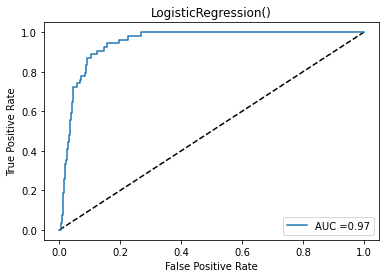

In [186]:
auc_roc(lr)

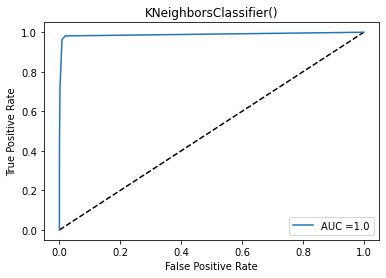

In [190]:
auc_roc(knn)

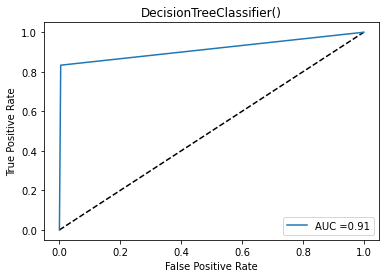

In [192]:
auc_roc(dtc)

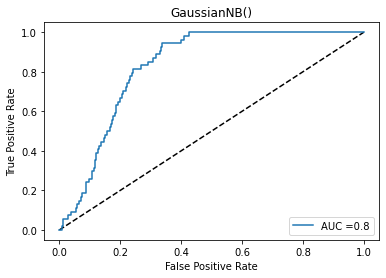

In [194]:
auc_roc(gnb)

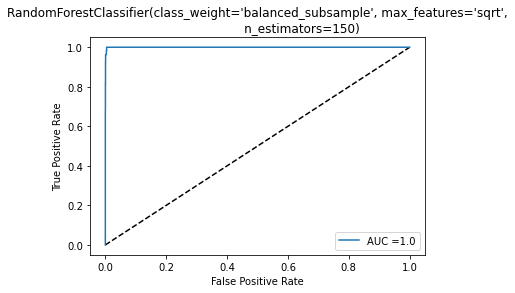

In [199]:
auc_roc(rfc)

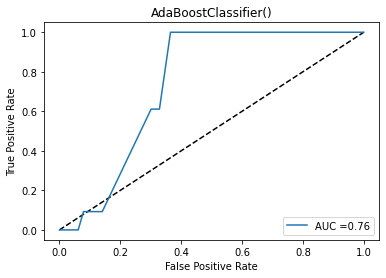

In [201]:
auc_roc(abc)

The auc roc curve for the KNeighborsClassifier and RandomForestClassifier is showing the best result. Since the Random Forest Classifier is providing the best accuracy score and performing well with all the tests, we can consider this model as the best model.

### Our model(rfc) is performing well with all the tests and providing an accuracy score of 93.54% after hyperparameter tuning and a ROC AUC score of 1.

### Saving the Best Model

In [205]:
import pickle

filename = 'avocado region identifier model.pkl'
pickle.dump(rfc,open(filename,'wb'))

### Conclusion

In [207]:
original = np.array(target_test)
predicted = np.round(np.array(rfc.predict(features_test)),0)
df_prediction = pd.DataFrame({'Original Data':original,'Predicted Data':predicted})
df_prediction.sample(10)

,Original Data,Predicted Data
1538,29,29
4,30,30
907,52,51
1970,27,27
837,41,41
182,5,5
2190,41,41
2380,41,41
1714,29,29
1750,41,41


#### Our model is performing well with predictions with an accuracy of 93.54%. Now this model can be used to find the region of Hass Avocados using the following features.

Average price,  product Lookup codes, bags(small, large, xlarge), type, year and month of sale of avocados.

#### Classification Model Created Successfully.

# 

### Considering the column 'AveragePrice' as Target variable and taking the Regression approach to build the model.

#### Splitting the data before removing skewness

In [43]:
x = data.drop('AveragePrice',axis =1)
y = data['AveragePrice']

In [44]:
print(x.shape)
print(y.shape)

(18249, 12)
(18249,)


In [45]:
#We are setting the standard limit for skewness as +/-0.8.
x.skew().sort_values(ascending=False)[np.abs(x.skew())>0.8]

XLarge Bags     13.139751
4770            10.159396
Large Bags       9.796455
Total Bags       9.756072
Small Bags       9.540660
Total Volume     9.007687
4225             8.942466
4046             8.648220
dtype: float64

In [46]:
from sklearn.preprocessing import power_transform
#user defined function for removing skewness for columns which are beyond standard range
def rskew(col):
    x[col]=power_transform((x[col].values.reshape(-1,1)))

In [47]:
rskew('XLarge Bags')
rskew('4770')
rskew('Large Bags')
rskew('Total Bags')
rskew('Small Bags')
rskew('Total Volume')
rskew('4225')
rskew('4046')

In [48]:
x.skew().sort_values(ascending=False)

XLarge Bags     0.793520
year            0.215339
Month           0.106617
4770            0.032184
Total Volume    0.011171
Small Bags      0.007058
type            0.000329
region          0.000030
Total Bags     -0.001626
4225           -0.017740
4046           -0.022679
Large Bags     -0.073809
dtype: float64

The skewness of data in variables which are above the standard limit has been removed.

### Removing the Outliers

In [49]:
from scipy.stats import zscore
df = x.copy()
df['AveragePrice'] = y.copy()
z = np.abs(zscore(df))
z

array([[0.08660524, 0.65861896, 0.30731294, ..., 1.7002522 , 1.64763162,
        0.18868864],
       [0.15574567, 0.77686953, 0.23164739, ..., 1.7002522 , 1.64763162,
        0.13901962],
       [0.17932662, 0.73194656, 0.57950332, ..., 1.7002522 , 1.64763162,
        1.18206895],
       ...,
       [0.77150535, 0.61983119, 0.77249619, ..., 1.70081131, 1.46495942,
        1.15237477],
       [0.69807719, 0.55028196, 0.71054316, ..., 1.70081131, 1.46495942,
        1.30138182],
       [0.66380937, 0.36790819, 0.78517306, ..., 1.70081131, 1.46495942,
        0.53151208]])

In [50]:
threshold = 3
df_new = df[(z<3).all(axis=1)]
df_new

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,AveragePrice
0,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,0.0,2015,0,12,1.33
1,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,0.0,2015,0,12,1.35
2,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,0.0,2015,0,12,0.93
3,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,0.0,2015,0,12,1.08
4,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,0.0,2015,0,11,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1.0,2018,53,2,1.63
18245,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1.0,2018,53,1,1.71
18246,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1.0,2018,53,1,1.87
18247,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1.0,2018,53,1,1.93


In [51]:
df.shape

(18249, 13)

In [52]:
df_new.shape

(18025, 13)

In [53]:
data_loss = (df.shape[0]-df_new.shape[0])/df.shape[0]*100
data_loss

1.2274645186037592

We are losing only 1.23% of data after removing the outliers.

### Checking the Multicolinearity of variables in the dataframe

In [54]:
x = df_new.drop('AveragePrice',axis = 1)
y = df_new['AveragePrice']
c = x.columns
print(x.shape)
print(y.shape)

(18025, 12)
(18025,)


In [55]:
#Scaling the data using standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x,columns = c)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,-0.086587,-0.662165,0.315657,-0.249098,-0.540823,-0.349220,-0.780341,-0.699248,-0.994964,-1.216044,-1.695233,1.647567
1,-0.156530,-0.781564,0.239177,-0.202628,-0.501663,-0.314201,-0.770300,-0.699248,-0.994964,-1.216044,-1.695233,1.647567
2,0.182434,-0.736205,0.590777,-0.007562,-0.569605,-0.375509,-0.757526,-0.699248,-0.994964,-1.216044,-1.695233,1.647567
3,0.004945,-0.637508,0.424603,-0.149610,-0.716973,-0.509178,-0.697830,-0.699248,-0.994964,-1.216044,-1.695233,1.647567
4,-0.188795,-0.689098,0.232261,-0.139148,-0.689959,-0.489057,-0.605796,-0.699248,-0.994964,-1.216044,-1.695233,1.365031
...,...,...,...,...,...,...,...,...,...,...,...,...
18020,-0.681398,-0.469054,-0.924331,-1.245762,-0.346083,-0.183567,-0.413286,-0.699248,1.005061,1.973748,1.716860,-1.177797
18021,-0.775441,-0.623052,-0.667499,-1.245762,-0.512971,-0.334220,-0.484781,-0.699248,1.005061,1.973748,1.716860,-1.460333
18022,-0.779442,-0.623000,-0.775776,0.403367,-0.506864,-0.316558,-0.952617,-0.699248,1.005061,1.973748,1.716860,-1.460333
18023,-0.705161,-0.552775,-0.713156,0.403065,-0.438333,-0.255334,-0.917201,-0.699248,1.005061,1.973748,1.716860,-1.460333


In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):
    vif = pd.DataFrame()
    vif['Column Name'] = x.columns
    vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [57]:
calc_vif(x)

,Column Name,VIF Factor
0,Total Volume,53.135682
1,4046,7.266308
2,4225,11.079923
3,4770,4.210747
4,Total Bags,34.868903
5,Small Bags,15.108782
6,Large Bags,3.428948
7,XLarge Bags,2.146293
8,type,3.684512
9,year,1.389063


We have high variance of inflation for the columns ['Total Volume','Total Bags']. Let's drop these columns and calculate the VIF again.

In [58]:
x1 = x.copy()
x1.drop(['Total Volume','Total Bags'],axis = 1,inplace = True)
x1.head()

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,-0.662165,0.315657,-0.249098,-0.349220,-0.780341,-0.699248,-0.994964,-1.216044,-1.695233,1.647567
1,-0.781564,0.239177,-0.202628,-0.314201,-0.770300,-0.699248,-0.994964,-1.216044,-1.695233,1.647567
2,-0.736205,0.590777,-0.007562,-0.375509,-0.757526,-0.699248,-0.994964,-1.216044,-1.695233,1.647567
3,-0.637508,0.424603,-0.149610,-0.509178,-0.697830,-0.699248,-0.994964,-1.216044,-1.695233,1.647567
4,-0.689098,0.232261,-0.139148,-0.489057,-0.605796,-0.699248,-0.994964,-1.216044,-1.695233,1.365031


In [59]:
calc_vif(x1)

,Column Name,VIF Factor
0,4046,3.932528
1,4225,4.344222
2,4770,4.193371
3,Small Bags,4.199734
4,Large Bags,1.974750
5,XLarge Bags,2.125456
6,type,3.417901
7,year,1.352929
8,region,1.090806
9,Month,1.052796


The VIF factor is now under 5 which is not showing much multicolinearity with the variables to each other.

#### Data has been preprocessed for building the Model

### Building the Model

#### Splitting the data into features and target

In [60]:
features = x1.copy()
target = y.copy()
print(features.shape)
print(target.shape)

(18025, 10)
(18025,)


In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

from sklearn.linear_model import Lasso,Ridge,ElasticNet  #Reguralization technique

from sklearn.model_selection import train_test_split

In [62]:
lr = LinearRegression()
knn = KNeighborsRegressor()
svr = SVR()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor(n_estimators=100)
abr = AdaBoostRegressor()

#### Finding the best random_state

In [63]:
#User defined function for finding the best random state
def best_ran(model):
    maxacc = 0
    maxrs = 0
    print(model)
    for i in range(1,100):
        features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = i)
        model.fit(features_train,target_train)
        pred_test = model.predict(features_test)
        acc = r2_score(target_test,pred_test)
        if acc>maxacc:
            maxacc = acc
            maxrs = i
    print("At random state ", maxrs, 'the model is having r2 score of ', maxacc)

In [64]:
#User defined Function for training and testing the model with best random state

def mod_test(model, ran):
    model
    print(model)
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = ran)
    model.fit(features_train,target_train)
    pred_test = model.predict(features_test)
    acc = r2_score(target_test,pred_test)
    mse = mean_squared_error(target_test,pred_test)
    mae = mean_absolute_error(target_test,pred_test)
    print("R2 score is ", acc)
    print("_"*50)
    print("Mean Sqaured Error is ",mse)
    print("_"*50)
    print("Mean Absolute Error is ",mae)
    print("_"*50)

#### LinearRegression

In [239]:
best_ran(lr)

LinearRegression()
At random state  49 the model is having r2 score of  0.5379612964561833


In [240]:
mod_test(lr,49)
print("Coefficent is ",lr.coef_)
print("_"*50)
print("Intercept is ",lr.intercept_)
print("_"*50)

LinearRegression()
R2 score is  0.5379612964561833
__________________________________________________
Mean Sqaured Error is  0.06691315223598067
__________________________________________________
Mean Absolute Error is  0.20304949907906283
__________________________________________________
Coefficent is  [-0.06769792  0.12884913  0.0409897  -0.06413596 -0.13294576  0.01061306
  0.21082291  0.08454487  0.0148025   0.07354258]
__________________________________________________
Intercept is  1.3977621839694239
__________________________________________________


#### KNeighborsRegressor

In [241]:
best_ran(knn)

KNeighborsRegressor()
At random state  12 the model is having r2 score of  0.8805858790948083


In [242]:
mod_test(knn,12)

KNeighborsRegressor()
R2 score is  0.8805858790948083
__________________________________________________
Mean Sqaured Error is  0.01780936699029126
__________________________________________________
Mean Absolute Error is  0.09577475728155341
__________________________________________________


#### SVR

In [243]:
best_ran(svr)

SVR()
At random state  12 the model is having r2 score of  0.8101267035538237


In [244]:
mod_test(svr,12)

SVR()
R2 score is  0.8101267035538237
__________________________________________________
Mean Sqaured Error is  0.028317615977352172
__________________________________________________
Mean Absolute Error is  0.12612250183861917
__________________________________________________


#### DecisionTreeRegressor

In [245]:
best_ran(dtr)

DecisionTreeRegressor()
At random state  45 the model is having r2 score of  0.7894363778703395


In [246]:
mod_test(dtr,45)

DecisionTreeRegressor()
R2 score is  0.7874275402387837
__________________________________________________
Mean Sqaured Error is  0.03225633841886269
__________________________________________________
Mean Absolute Error is  0.11697919556171983
__________________________________________________


#### RandomForestRegressor

In [247]:
best_ran(rfr)

RandomForestRegressor()
At random state  26 the model is having r2 score of  0.9009127824295627


In [248]:
mod_test(rfr,26)

RandomForestRegressor()
R2 score is  0.900811699183567
__________________________________________________
Mean Sqaured Error is  0.014611658446601943
__________________________________________________
Mean Absolute Error is  0.08581386962552011
__________________________________________________


#### AdaBoostRegressor

In [249]:
best_ran(abr)

AdaBoostRegressor()
At random state  85 the model is having r2 score of  0.5803621631329083


In [250]:
mod_test(abr,85)

AdaBoostRegressor()
R2 score is  0.5832180068556483
__________________________________________________
Mean Sqaured Error is  0.06261123600671417
__________________________________________________
Mean Absolute Error is  0.2016735358569797
__________________________________________________


After testing the algorithms, the RandomForestRegressor is providing the maximum accuracy score of 90.1%. Now let's check the cross validations for all the models to find the best performing model.

### Cross Validation

In [65]:
#User defined function for checking cross validation for each model
from sklearn.model_selection import cross_val_score

def cross_val(model,ran):    #ran = random_state
    cv_mean = 0
    cv_fold = 0
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = ran)
    model.fit(features_train,target_train)
    pred_test = model.predict(features_test)
    for j in range(2,10):
        cv_score = cross_val_score(model,features, target, cv = j)
        a =cv_score.mean()
        if a>cv_mean:
            cv_mean = a
            cv_fold = j
    print(model)
    print("At cv fold",cv_fold," the cv score is ", cv_mean, "and the R2 score  is ",r2_score(target_test,pred_test))

#### LinearRegression

In [252]:
cross_val(lr,49)

LinearRegression()
At cv fold 5  the cv score is  0.09876355100696818 and the R2 score  is  0.5379612964561833


#### KNeighborsRegressor

In [253]:
cross_val(knn,12)

KNeighborsRegressor()
At cv fold 5  the cv score is  0.03364276169722495 and the R2 score  is  0.8805858790948083


#### SVR

In [254]:
cross_val(svr,12)

SVR()
At cv fold 9  the cv score is  0.2413520668881951 and the R2 score  is  0.8101267035538237


#### DecisionTreeRegressor

In [255]:
cross_val(dtr,45)

DecisionTreeRegressor()
At cv fold 0  the cv score is  0 and the R2 score  is  0.7818701034531864


#### RandomForestRegressor

In [256]:
cross_val(rfr,26)

RandomForestRegressor()
At cv fold 9  the cv score is  0.33860262605568797 and the R2 score  is  0.8990649271787476


#### AdaBoostRegressor

In [257]:
cross_val(abr,85)

AdaBoostRegressor()
At cv fold 9  the cv score is  0.03662589788780476 and the R2 score  is  0.5794335650580337


#### After cross validation the RandomForestRegressor(rfr) is performing well with an accuracy score of 89.91% and a cross validation mean score of 33.86% with 9 cross validations. Since the random forest regressor is performing well, we can consider this model (rfr) as the best performing model. 

In [86]:
rfr = RandomForestRegressor(n_estimators=100)
features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = 26)
rfr.fit(features_train, target_train)
pred_test = rfr.predict(features_test)

cv_score = cross_val_score(rfr,features, target, cv = 9)
cv_mean =cv_score.mean()
print("At cv fold",9," the cv score is ", cv_mean, "and the R2 score  is ",r2_score(target_test,pred_test))

At cv fold 9  the cv score is  0.34418363774554 and the R2 score  is  0.9004629982180139


### Regularization

In [259]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1],'random_state':list(range(0,10))}

### Lasso(L1)

In [260]:
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [261]:
ls = Lasso(alpha = 0.0001, random_state = 0)
ls.fit(features_train,target_train)
pred_ls = ls.predict(features_test)

lss = r2_score(target_test,pred_ls)
lss

0.5176701690618137

In [262]:
cross_val(ls,0)

Lasso(alpha=0.0001, random_state=0)
At cv fold 5  the cv score is  0.0988449908438688 and the R2 score  is  0.5005857658878388


### Ridge(L2)

In [263]:
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [264]:
rd = Ridge(alpha = 1,random_state=0)
rd.fit(features_train,target_train)
pred_rd = rd.predict(features_test)

rds = r2_score(target_test,pred_rd)
rds

0.517691726366172

In [265]:
cross_val(rd,0)

Ridge(alpha=1, random_state=0)
At cv fold 5  the cv score is  0.09878344783725564 and the R2 score  is  0.500579693046766


### ElasticNet

In [266]:
en = ElasticNet()
clf = GridSearchCV(en,parameters)
clf.fit(features_train, target_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [267]:
en = ElasticNet(alpha = 0.0001, random_state = 0)
en.fit(features_train,target_train)
pred_en = en.predict(features_test)

ens = r2_score(target_test,pred_en)
ens

0.517681252423528

In [268]:
cross_val(en,0)

ElasticNet(alpha=0.0001, random_state=0)
At cv fold 5  the cv score is  0.09881821047065813 and the R2 score  is  0.5005837900777337


The regularization techniques didn't provide better resuls. So we can stick with our random forest regressor(rfr) as it is performing well with all the tests and validations.

### Hyperparameter Tuning

In [78]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
parameters = {'n_estimators':[100,125,150],
             'criterion': ['squared_error','absolute_error'],
             'max_features': ['sqrt','log2'],
             'max_depth':[10,20,None]}

grid = HalvingGridSearchCV(estimator = RandomForestRegressor(),param_grid=parameters, cv = 9)

In [79]:
grid.fit(features,target)

HalvingGridSearchCV(cv=9, estimator=RandomForestRegressor(),
                    param_grid={'criterion': ['squared_error',
                                              'absolute_error'],
                                'max_depth': [10, 20, None],
                                'max_features': ['sqrt', 'log2'],
                                'n_estimators': [100, 125, 150]})

In [80]:
grid.best_score_

0.4244848822176822

In [81]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 125}

In [88]:
rfr = RandomForestRegressor(n_estimators=125,max_depth=None,max_features='sqrt',criterion='squared_error')
features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = 26)
rfr.fit(features_train, target_train)
pred_test = rfr.predict(features_test)

cv_score = cross_val_score(rfr,features, target, cv = 9)
cv_mean =cv_score.mean()
print("At cv fold",9," the cv score is ", cv_mean, "and the R2 score  is ",r2_score(target_test,pred_test))

print('R2 Score',r2_score(target_test,pred_test))
print('Mean Squared Error',mean_squared_error(target_test,pred_test))
print('Mean Absolute Error',mean_absolute_error(target_test,pred_test))

At cv fold 9  the cv score is  0.4284043996615022 and the R2 score  is  0.8965516547215
R2 Score 0.8965516547215
Mean Squared Error 0.015239215468294041
Mean Absolute Error 0.0881058529819695


#### Our model is performing well with hyper parameter tuning because the cross validation score has been improved. After all the tests, corss validations, and tuning our model is performing with R2 score 89.66% with mean squared error of 0.02 and mean absolute error of 0.09. The cross validation mean score is 42.84% at 9 cross validations.

### Saving the best model

In [90]:
import pickle

filename = 'avocado average price prediction model.pkl'
pickle.dump(rfr,open(filename,'wb'))

### Conclusion

In [94]:
original = np.array(target_test)
predicted = np.round(np.array(rfr.predict(features_test)),2)

prediction_test = pd.DataFrame({'Original Average Price (W)':original,'Predicted Average Price (W)':predicted})
prediction_test.sample(10)

,Original Average Price (W),Predicted Average Price (W)
1096,1.12,1.12
2411,1.68,1.78
1847,1.44,1.36
1895,1.91,1.71
203,1.61,1.62
1932,1.24,1.54
912,1.05,1.03
1584,1.05,0.97
1000,1.09,1.11
2203,1.18,1.15


#### Our model is performing well with predictions with an R2 Score of 89.66%. Now this model can be used to predict the average price of Hass Avocados using the following features.
**Region, product Lookup codes, bags(small, large, xlarge), type, year and month of sale of avocados.**

#### Regression Model Created Successfully